# Chapter 17: Model Selection and Cross Validation
## Exercises solutions

The dataset used in this chapter is the *Iris dataset* and can be imported with the Sklearn laod_iris() function.

In [90]:
# import all the modules
import sklearn
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import time

Load the dataset and show its attributes:

In [91]:
# load the dataset
iris = load_iris() 
# we can see that this dataset is a class 
print(f'Dataset type: \n{type(iris)}\n')
# and it has some functions and attributes that describe it
print(f'Dataset attributes: \n{iris.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{iris.feature_names}\n')
# these are the targets/labels (y)
print(f'Target names: \n{iris.target_names}\n')
# number of samples
print(f'Number of samples: \n{len(iris.data)}\n')

Dataset type: 
<class 'sklearn.utils.Bunch'>

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feaures names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: 
['setosa' 'versicolor' 'virginica']

Number of samples: 
150



## Exercise 1
Implement the model selection and HP tuning as above for the iris dataset.

Our question now is, whether to use KNN or a Decision Tree (DT) classifier. We start by training both models on our training set and calculate the performance on the test set. <br>
### Data Preparation
We start off by splitting our data in train and test sets:

In [92]:
# import the function to split the data in train and test set
from sklearn.model_selection import train_test_split

# set the seed to promote the reproducibility of the results (it controls the randomness in the splits in this case)
seed = 0

# assign features and targets to X and y
X = iris.data
y = iris.target

# split features and targets in train and test sets (). Note how we can easily stratify the sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = seed, stratify = y)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 105
Number of targets in the training set: 105
Number of features in the test set: 45
Number of targtes in the test set: 45


### Model Tuning

We train both classifiers and check their accuracy on training and test sets:

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# train both classifiers
dtc = DecisionTreeClassifier(max_depth=5,random_state=0)
dtc.fit(X_train,y_train)

#knn = KNeighborsClassifier(n_neighbors=1)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# helper functions to calculate the accuracy values on train and test set. 
def accuracy(X,y,predictor):
    return np.sum(np.equal(predictor.predict(X),y))/len(X)

def trainValTestAcc(predictor):
    vals = {}
    vals['train'] = accuracy(X_train,y_train,predictor)
    vals['test'] = accuracy(X_test,y_test,predictor)
    return vals

print(" DT: ",trainValTestAcc(dtc))
print("KNN: ",trainValTestAcc(knn))

 DT:  {'train': 1.0, 'test': 0.9777777777777777}
KNN:  {'train': 0.9619047619047619, 'test': 1.0}


*Sklearn* offers some convenient functions to measure the models' metrics. Above we illustrated how to build our own helper function (sometimes we will need that!), below an alternative ready-to-go:

In [94]:
# import the function to measure the models'accuracy 
from sklearn.metrics import accuracy_score

# calculate the accuracy of both models on train and test sets.
dt_train = accuracy_score(y_train, dtc.predict(X_train))
dt_test = accuracy_score(y_test, dtc.predict(X_test))
knn_train = accuracy_score(y_train, knn.predict(X_train))
knn_test = accuracy_score(y_test, knn.predict(X_test))

# print the results (matching the previous ones as expected)
print(f" DT train: {dt_train},  DT test: {dt_test}")
print(f"KNN train: {knn_train}, KNN test: {knn_test}")


 DT train: 1.0,  DT test: 0.9777777777777777
KNN train: 0.9619047619047619, KNN test: 1.0


Both models do extremely well on train and test set, with the KNN performing better on the unseen data. <br>

- vary the n_neighbors parameter for KNN:

In [95]:
#knn = KNeighborsClassifier
neighbors = np.arange(1, 10)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    print(f"KNN_{n}: {trainValTestAcc(knn)}")

KNN_1: {'train': 1.0, 'test': 0.9777777777777777}
KNN_2: {'train': 0.9619047619047619, 'test': 0.9333333333333333}
KNN_3: {'train': 0.9428571428571428, 'test': 1.0}
KNN_4: {'train': 0.9619047619047619, 'test': 1.0}
KNN_5: {'train': 0.9619047619047619, 'test': 1.0}
KNN_6: {'train': 0.9523809523809523, 'test': 1.0}
KNN_7: {'train': 0.9523809523809523, 'test': 1.0}
KNN_8: {'train': 0.9523809523809523, 'test': 1.0}
KNN_9: {'train': 0.9714285714285714, 'test': 1.0}


- plot the validation curve:

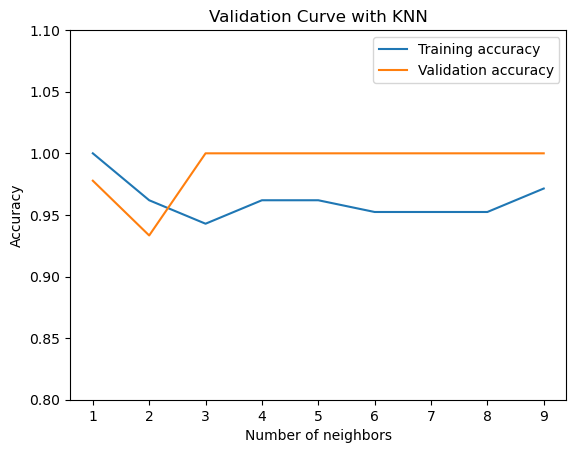

In [96]:
# these two lists will store our results 
train_scores = []; val_scores = []

# test the KNN at different number of neighbors and append the results to the above lists
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    train_scores.append(accuracy_score(y_train, knn.predict(X_train)))
    val_scores.append(accuracy_score(y_test, knn.predict(X_test)))

# plot the training and validation curves 
plt.title("Validation Curve with KNN")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.1)
plt.plot(neighbors, train_scores, label="Training accuracy")
plt.plot(neighbors, val_scores, label="Validation accuracy")
plt.legend(loc="best")
plt.show()

## Exercises 2 
Implement nested cross-validation for tuning the max_depth of the decision tree on wine dataset. 

We start-off by importing the wine dataset:

In [97]:
from sklearn.datasets import load_wine
dataset = load_wine()

# we can see that this dataset is a class 
print(f'Dataset type: \n{type(dataset)}\n')
# and it has some functions and attributes that describe it
print(f'Dataset attributes: \n{dataset.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{dataset.feature_names}\n')
# these are the targets/labels (y)
print(f'Target names: \n{dataset.target_names}\n')
# number of samples
print(f'Number of samples: \n{len(dataset.data)}\n')

Dataset type: 
<class 'sklearn.utils.Bunch'>

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

Feaures names: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: 
['class_0' 'class_1' 'class_2']

Number of samples: 
178



### Data Preparation

We store the features and targets in two variables and create the training, validation and test sets:

In [98]:
# store features and targets 
X = dataset.data
y = dataset.target

# create the training and test sets 
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=seed)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 124
Number of targets in the training set: 124
Number of features in the test set: 54
Number of targtes in the test set: 54


### Model Tuning

In [99]:
# import the module to run nested cross validation
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# we store all the scores here (useful for the next exercise)
nested_scores = [] 
# we store all the mean score here 
nested_scores_mean = [] 

# set the range of values for our hyperparameter
md = np.arange(1, 10)

# test the KNN at different number of neighbors and append the results to the above lists
for d in md:
    dtc = DecisionTreeClassifier(max_depth = d, random_state = 0)
    nested_score = cross_val_score(dtc, dataset.data, dataset.target, cv = 5)
    print(f'Nested scores at maximum depth = {d}: \n{nested_score}')
    nested_scores.append(nested_score)
    nested_scores_mean.append(nested_score.mean())

Nested scores at maximum depth = 1: 
[0.52777778 0.66666667 0.69444444 0.6        0.74285714]
Nested scores at maximum depth = 2: 
[0.80555556 0.80555556 0.77777778 0.74285714 0.97142857]
Nested scores at maximum depth = 3: 
[0.94444444 0.83333333 0.91666667 0.8        0.97142857]
Nested scores at maximum depth = 4: 
[0.94444444 0.86111111 0.88888889 0.91428571 0.97142857]
Nested scores at maximum depth = 5: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
Nested scores at maximum depth = 6: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
Nested scores at maximum depth = 7: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
Nested scores at maximum depth = 8: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
Nested scores at maximum depth = 9: 
[0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]


Above we note that, since we indicated a 5 fold split (cv = 5) we are now generating 5 scores (one on each fold) for each parameter we are testing; we are essentially scoring our model on 5 subsets of the original dataset. 

Below we plot the results, taking the mean of the five scores at each maximum depth:

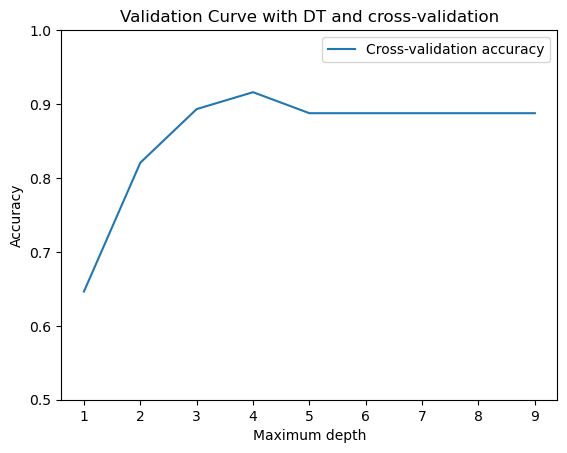

In [100]:
# plot the training and validation curves 
plt.title("Validation Curve with DT and cross-validation")
plt.xlabel("Maximum depth")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)
plt.plot(md, nested_scores_mean,label="Cross-validation accuracy")
plt.legend(loc="best");

From the above results it would seem that 4 is the optimal *maximum depth* for our classification tree, on this data.

## Exercise 3
Implement a validation curve plot that shows the accuracies plus and minus the standard deviation. 

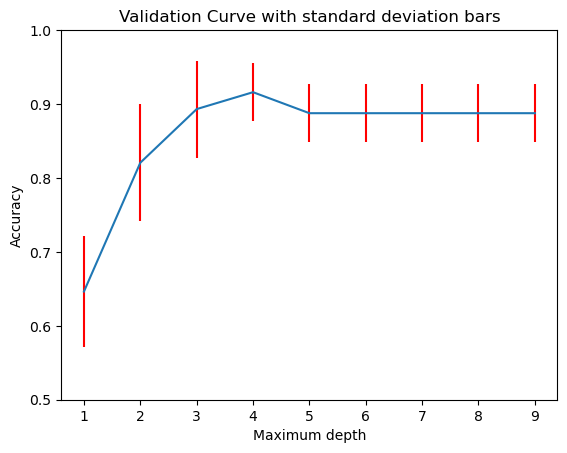

In [101]:
# store the standard deviations in a variable 
sd = np.std(nested_scores, axis = 1)

# plot the validation curve with the standard deviations (red)
plt.errorbar(md, nested_scores_mean, yerr= sd, ecolor= 'red')
plt.title("Validation Curve with standard deviation bars")
plt.xlabel("Maximum depth")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1);

# Exercise 4
Tune a KNN model on the Abalone dataset with the hyperparameters k (number of neighbors), and p (metric exponent). Evaluate the results in a 2-dimensional grid search with cross-validation. Make sure to avoid overfitting and estimate model performance. 

Here it is the link to the Abalone dataset: https://archive.ics.uci.edu/ml/datasets/Abalone <br>
### Dataset Information
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.
From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).


The aim of this exercise is to *predict the age of abalone from physical measurements*. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope, a boring and time-consuming task. Thankfully Machine Learning can help us with this! 

In [102]:
import pandas as pd

# columns names as per documentation
columns = ["sex", "length", "diameter", "height", "whole weight", 
           "shucked weight", "viscera weight", "shell weight", "rings"]

# read the dataframe from the repository
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names = columns)

# print the info on the dataframe
print(df.info())

# show the first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Data Preparation

We start off with converting the categorical data to numbers (*one hot encoding*):

In [103]:
# one hot encode the sex column 
sex_encoded = pd.get_dummies(df.sex)
# concatenate the new columns (one for each gender: female, infant, male) to the original dataframe 
df = pd.concat([sex_encoded, df.iloc[:, 1:]], axis=1)
# preview the new dataframe
df.head()

,F,I,M,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


We split the data in training and test sets:

In [104]:
# store the features in a variable X
X = df.iloc[:, :-1].values
# store the targets in a variable y
y = df.iloc[:, -1].values

# create the training and test sets 
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=seed)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 2923
Number of targets in the training set: 2923
Number of features in the test set: 1254
Number of targtes in the test set: 1254


Normalize the features:

In [105]:
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data. 

# scale both training and test sets
X_train = sclr.transform(X_train) 
X_test = sclr.transform(X_test)

### Model Tuning

Create a gridsearch to test the model hyperparameters:

In [106]:
from sklearn.neighbors import KNeighborsRegressor

# hyperparameters to search
parameters = {'n_neighbors':np.arange(1, 20), 'p':[1, 2]}

#model 
knn = KNeighborsRegressor()

# in sklearn all scorer objects follow the convention that higher return values are better than lower return values. 
# Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error.
scoring = {'MSE': 'neg_root_mean_squared_error'}

# set a 5 fold nested grid search
clf = GridSearchCV(knn, parameters, scoring = scoring, refit = False, cv = 5)
clf.fit(X_train, y_train)

# display the top ranked models 
pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_MSE').head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_MSE,split1_test_MSE,split2_test_MSE,split3_test_MSE,split4_test_MSE,mean_test_MSE,std_test_MSE,rank_test_MSE
25,0.001929,0.000168,0.004902,0.000516,13,2,"{'n_neighbors': 13, 'p': 2}",-2.118342,-2.212759,-2.193963,-2.359684,-2.281592,-2.233268,0.081841,1


Above we see the details of the best performing model.

### Model Testing

To make sure this model is not overfitting the training data (it should not since we crossvalidated it) we train a new model with the same parameters and test it on the test set:

In [107]:
from sklearn.metrics import mean_squared_error

#model 
knn = KNeighborsRegressor(n_neighbors = 13, p =2)
knn.fit(X_train, y_train)

# predicted labels 
y_pred = knn.predict(X_test)

# root mean squared error between predicted and true
print(f'Negative RMSE on test data: {-mean_squared_error(y_test, y_pred, squared=False)}')

Negative RMSE on test data: -2.2514210380011512


The negative root squared mean error on the test data is very similar to the training data's therefore we can conclude that our model did not overfit the training. <br> Additionally we can estabilish the expected error of our model on unseen data (i.e., it predicts the age of the abalone with a RMSE of 2.25 years). 

### Display Results

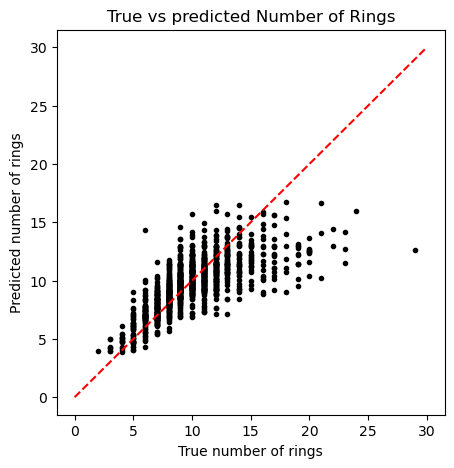

In [108]:
# display the results

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(y_test, y_pred, color = 'black', marker = '.')
ax.plot([0, 30], [0, 30], '--r')
ax.set_xlabel('True number of rings')
ax.set_ylabel('Predicted number of rings')
plt.title('True vs predicted Number of Rings');

# Exercise 5
Tune a DT to classify web pages in the Website Phishing dataset with the hyperparameters minimum numbers to split a leaf, maximum tree depth, minimum number of samples in a leaf. Evaluate the results in a 3-dimensional grid search with cross-validation.  Make sure to avoid overfitting and estimate model performance.  

The *Website Phishing" dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Website+Phishing# (enter the Data Folder). <br>
Given the *arff* format of this dataset we import it following *Sklearn* documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html

### Dataset information

The phishing problem is considered a vital issue in the .COM industry especially e-banking and e-commerce taking the number of online transactions involving payments.
We have identified different features related to legitimate and phishy websites and collected 1353 different websites from difference sources. Phishing websites were collected from Phishtank data archive (www.phishtank.com), which is a free community site where users can submit, verify, track and share phishing data. The legitimate websites were collected from Yahoo and starting point directories using a web script developed in PHP. The PHP script was plugged with a browser and we collected 548 legitimate websites out of 1353 websites. There is 702 phishing URLs, and 103 suspicious URLs.

When a website is considered SUSPICIOUS that means it can be either phishy or legitimate, meaning the website held some legit and phishy features.



In [109]:
# import the modules to load the dataset
from scipy.io.arff import loadarff 
import urllib.request
import io 

# load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00379/PhishingData.arff'
ftpstream = urllib.request.urlopen(url)
data, meta = loadarff(io.StringIO(ftpstream.read().decode('UTF-8')))

# make the dataset a Pandas dataframe and display its first 5 rows
df = pd.DataFrame(data) # the data is originally bytes, hence .astype(int)
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,b'1',b'-1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'0',b'0'
1,b'-1',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1'
2,b'1',b'-1',b'0',b'0',b'-1',b'0',b'-1',b'1',b'0',b'1'
3,b'1',b'0',b'1',b'-1',b'-1',b'0',b'1',b'1',b'0',b'0'
4,b'-1',b'-1',b'1',b'-1',b'0',b'0',b'-1',b'1',b'0',b'1'


The collected features hold the categorical values: *Legitimate*, *Suspicious* and *Phishy*. These values have been replaced with numerical values 1,0 and -1 respectively. <br>

### Data Preparation

Notice how the data is of type "bytes", hence those "b".

In [110]:
# check the type of one of the entries
type(df.iloc[1, 1])

bytes

We can easily fix the data type like so:

In [111]:
# convert from bytes to integers
df = df.astype(int)
df.head(3)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1


We create the train and test sets:

In [112]:
# store the features in a variable X
X = df.iloc[:, :-1].values
# store the targets in a variable y
y = df.iloc[:, -1].values

# create the training and test sets 
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=seed)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of targets in the training set: {len(y_train)}')
print(f'Number of features in the test set: {len(X_test)}')
print(f'Number of targtes in the test set: {len(y_test)}')

Number of features in the training set: 947
Number of targets in the training set: 947
Number of features in the test set: 406
Number of targtes in the test set: 406


### Model Tuning

Tune a DT to classify web pages in the Website Phishing dataset with the hyperparameters minimum numbers to split a leaf, maximum tree depth, minimum number of samples in a leaf:

In [113]:
# decision tree classifier
dtc = DecisionTreeClassifier()

# set the search space 
space = np.arange(1, 10)
# hyperparameters to tune
parameters = {'min_samples_split': 1 + space, 'max_depth': space, 'min_samples_leaf': space}

# score the model on accuracy
scoring = {'Accuracy': 'accuracy'}

# set a 5 fold nested grid search
clf = GridSearchCV(dtc, parameters, cv = 5, scoring = scoring, refit = False)
clf.fit(X_train, y_train)

# display the top ranked models 
top_performing = pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_Accuracy')
top_performing.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy
567,0.0008,0.0004,0.000201,0.000401,8,1,2,"{'max_depth': 8, 'min_samples_leaf': 1, 'min_s...",0.936842,0.9,0.899471,0.904762,0.910053,0.910226,0.013846,1


Above we see all the details of the best performing model and below we display its parameters:

In [114]:
# display the top ranked model's parameters
top_performing.loc[top_performing['rank_test_Accuracy'] == 1].params.values[0]

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

### Model Testing

To make sure this model is not overfitting the training data (it should not since we crossvalidated it) we train a new model with the same parameters and test it on the test set:

In [115]:
#model 
dtc = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 1, min_samples_split = 2)
dtc.fit(X_train, y_train)

# predicted labels 
y_pred = dtc.predict(X_test)

# root mean squared error between predicted and true
print(f'Accuracy on test data: {accuracy_score(y_test, y_pred)}')

Accuracy on test data: 0.8694581280788177


The accuracy on the test data is very similar to the training data's therefore we can conclude that our model did not overfit the training set. <br> Additionally we can estabilish the expected accuracy of our model on unseen data (i.e., it correctly identifies about 87% of the websites). 


### Display Results

In [116]:
# create lists containing the classes names (useful to plot the results) 
y_test_lab = ['Legitimate' if n == 1 else 'Suspicious' if n == 0 else 'Fishy' for n in y_test]
y_pred_lab = ['Legitimate' if n == 1 else 'Suspicious' if n == 0 else 'Fishy' for n in y_pred]

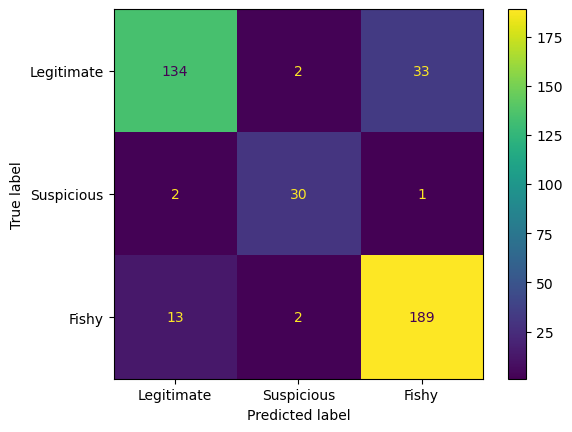

In [117]:
# import modules to create and display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create the confusion matrix
cf_matrix = confusion_matrix(y_test_lab, y_pred_lab, 
                             labels= ['Legitimate', 'Suspicious', 'Fishy' ]) 

# display the results
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                               display_labels= set(y_pred_lab))

disp.plot();

From the above confusion matrix we notice how accurate our model is (it makes very few errors!) and how the most mistakes are made on classifying as fishy websites that are actually legitimate. 